In [58]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras.preprocessing.image import ImageDataGenerator  
import matplotlib.pyplot as plt
import cv2
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


In [9]:
dataset_path = '/content/drive/MyDrive/Dataset/5Animals'


idg = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,  #درجه
    zoom_range=0.2,   #درصد
    horizontal_flip=True,
    validation_split=0.2
)

dataset_train = idg.flow_from_directory(
    dataset_path,
    shuffle=True,
    # save_to_dir='/content/drive/MyDrive/Dataset/Animal_test',   
    subset='training',
    target_size=(224, 224)  # دیتاها ابعادشون 224*224 باشد  #بعد آکمنت کردن باید سایز تعیین کنیم
)

dataset_validation = idg.flow_from_directory(
    dataset_path,
    shuffle=True,
    subset='validation',
    target_size=(224, 224)  
)

Found 1042 images belonging to 5 classes.
Found 257 images belonging to 5 classes.


In [10]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), strides=(2, 2), activation="relu", padding="same", input_shape=(224, 224, 3)), #ورودی شبکه باید 224*224 باشد
    layers.MaxPooling2D(),
    layers.Conv2D(64, (3, 3), strides=(1, 1), activation="relu", padding="same"),
    layers.MaxPooling2D(),
    layers.Conv2D(128, (3, 3), strides=(1, 1), activation="relu"),
    layers.MaxPooling2D(),

    layers.Flatten(),

    layers.Dense(512, activation="relu"),
    layers.Dense(5, activation="softmax"),
])

In [11]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss=tf.keras.losses.categorical_crossentropy,
              metrics=['accuracy']
              )

In [10]:
history = model.fit(dataset_train, 
                    validation_data=dataset_validation,  
                    epochs=20)

Epoch 1/20
33/33 [==============================] - 918s 28s/step - loss: 0.4087 - accuracy: 0.8340 - val_loss: 1.0507 - val_accuracy: 0.6965
Epoch 2/20
33/33 [==============================] - 29s 889ms/step - loss: 0.3221 - accuracy: 0.8887 - val_loss: 1.0504 - val_accuracy: 0.7315
Epoch 3/20
33/33 [==============================] - 30s 892ms/step - loss: 0.3592 - accuracy: 0.8628 - val_loss: 0.9949 - val_accuracy: 0.6770
Epoch 4/20
33/33 [==============================] - 34s 1s/step - loss: 0.3052 - accuracy: 0.8935 - val_loss: 1.1026 - val_accuracy: 0.7198
Epoch 5/20
33/33 [==============================] - 29s 874ms/step - loss: 0.2691 - accuracy: 0.8964 - val_loss: 1.1162 - val_accuracy: 0.6887
Epoch 6/20
33/33 [==============================] - 29s 874ms/step - loss: 0.3037 - accuracy: 0.8800 - val_loss: 1.0616 - val_accuracy: 0.6965
Epoch 7/20
33/33 [==============================] - 30s 899ms/step - loss: 0.2297 - accuracy: 0.9060 - val_loss: 0.8975 - val_accuracy: 0.7432
Epo

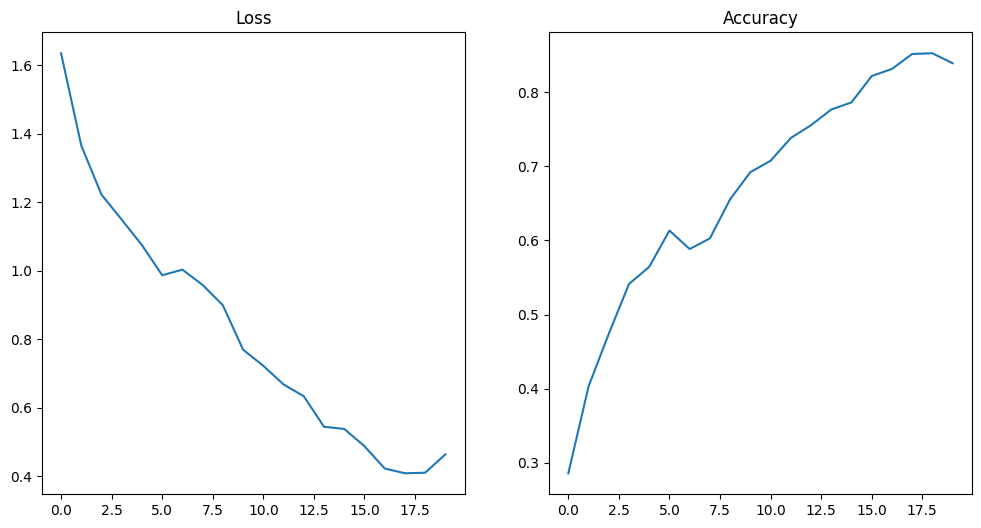

In [8]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
ax1.plot(history.history['loss'])
ax1.set_title("Loss")
ax2.plot(history.history['accuracy'])
ax2.set_title("Accuracy")
plt.show()

In [15]:
prediction_data = model.predict(dataset_validation)

9/9 [==============================] - 69s 8s/step


In [33]:
predictions = np.argmax(prediction_data, axis=1)


In [52]:
confusion_matrix = confusion_matrix(dataset_validation.classes, predictions)
confusion_matrix


array([[ 0,  0, 53,  4,  0],
       [ 1,  0, 59,  2,  0],
       [ 0,  0, 40,  2,  0],
       [ 1,  0, 38,  5,  0],
       [ 0,  0, 52,  0,  0]])

In [56]:
confusion_matrix_display = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0, 1, 2, 3, 4])

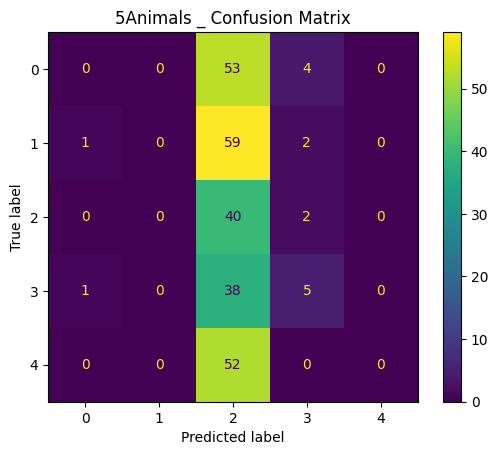

In [57]:
confusion_matrix_display.plot()
plt.title("5Animals _ Confusion Matrix")
plt.show()

In [62]:
image = cv2.imread("Assets/Elephant.jpg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image = cv2.resize(image , (224, 224))
image = image // 255.0
image = image.reshape(1, 224, 224, 3)
result = model.predict(image)
predicted_class = np.argmax(result)

1/1 [==============================] - 0s 29ms/step


In [63]:
if predicted_class == 0:
    print("🐈")
elif predicted_class == 1:
    print("🐶")
elif predicted_class == 2:
    print("🐘")
elif predicted_class == 3:
    print("🦒")
elif predicted_class == 4:
    print("🐼")

🐘
